# Obligatorisk innlevering 2 - oppgave 2

I denne oppgaven skal vi forsøke å forutsi oppsigelser ved en arbeidsplass basert på en rekke variabler som f.eks alder, kjønn, utdannelse, lønn, osv.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [43]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett2.csv")

### Preprosessering:
For å forenkle håndteringen av kategoriske data har jeg her skrevet noe kode som gjør om strenger til intergers

Følgende kolonner er formatert som *object* og inneholder kategoriske variabler i form av strenger

In [46]:
kolonner_obj = df.select_dtypes(include=['object']).columns
print(kolonner_obj)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


I koden under omformer jeg strengene til integers og gir dere "nøkkelen" til å konvertere det tilbake igjen

In [49]:
for i in kolonner_obj:
    print("-----------")
    print(i)
    print("-----------")
    for num, j in enumerate(list(df[i].unique())):
        print("{} = {}".format(j,num))
        df[i].loc[df[i]==j] = num
    df[i] = pd.to_numeric(df[i])

-----------
BusinessTravel
-----------
Travel_Frequently = 0
Travel_Rarely = 1
Non-Travel = 2
-----------
Department
-----------
Research & Development = 0
Sales = 1
Human Resources = 2
-----------
EducationField
-----------
Medical = 0
Other = 1
Marketing = 2
Life Sciences = 3
Technical Degree = 4
Human Resources = 5
-----------
Gender
-----------
Male = 0
Female = 1
-----------
JobRole
-----------
Laboratory Technician = 0
Sales Representative = 1
Sales Executive = 2
Healthcare Representative = 3
Manager = 4
Manufacturing Director = 5
Research Scientist = 6
Human Resources = 7
Research Director = 8
-----------
MaritalStatus
-----------
Married = 0
Divorced = 1
Single = 2
-----------
Over18
-----------
Y = 0
-----------
OverTime
-----------
Yes = 0
No = 1


C:\Users\olida\AppData\Local\Temp\ipykernel_54360\3482823818.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[i].loc[df[i]==j] = num
C:\Users\olida\AppData\Local\Temp\ipykernel_54360\3482823818.py:7: SettingWithCopyWarning: 
A value is

I outputen fra koden nedenfor viser datatypen til de forskjellige kolonnene, som nå etter preprosesseringen bare består av integers (int64). 

In [52]:
print(df.dtypes)

id                          int64
Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalanc

In [54]:
# Her deler jeg datasettet inn i egenskaper (X) og target (y) (fjerner også den første kolonnen siden det bare er en ID 
# og har dermed ingen prediktiv verdi)

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# PS: Ikke endre denne kodecellen!

#### Oppgave 2.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? Begrunn svaret

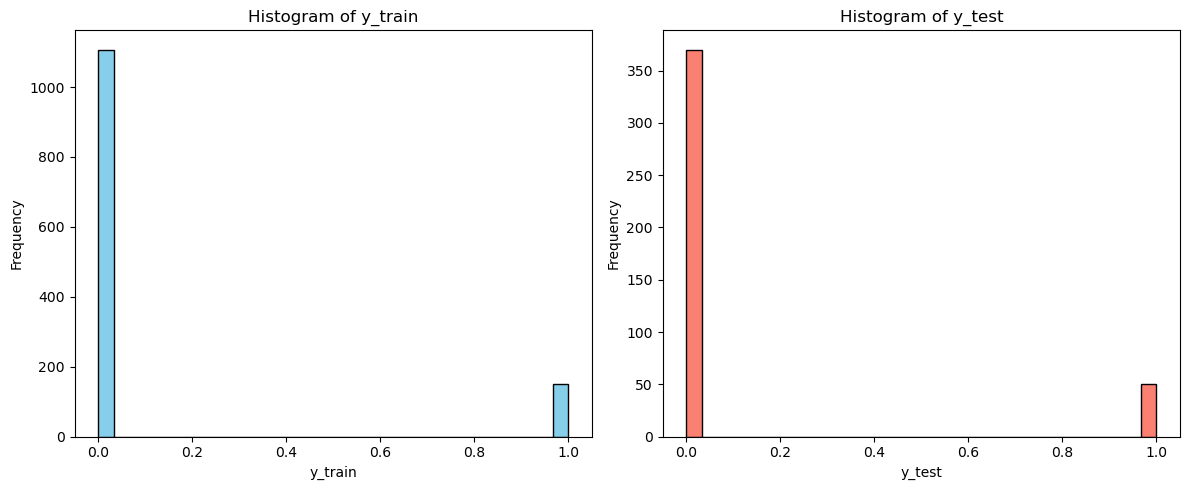

In [57]:
# Plot histograms for y_train and y_test
plt.figure(figsize=(12, 5))

# Histogram for y_train
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of y_train")
plt.xlabel("y_train")
plt.ylabel("Frequency")

# Histogram for y_test
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, color='salmon', edgecolor='black')
plt.title("Histogram of y_test")
plt.xlabel("y_test")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


**Svar:**

*Basert på histogrammen, kan vi ser at det kun tas i bruk målvariablene 0 og 1, som tyder på at vi skal løse en klassifikasjonsoppgave.*

#### Oppgave 2.2)
Velg to modeller og gjør repeterte kryssvalideringer $(10)$ med $K=5$
* Velg hvorvidt du vil bruke "default" hyperparamtre for modellene eller om du vil gjøre et hyperparametersøk
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene skriftlig til slutt 


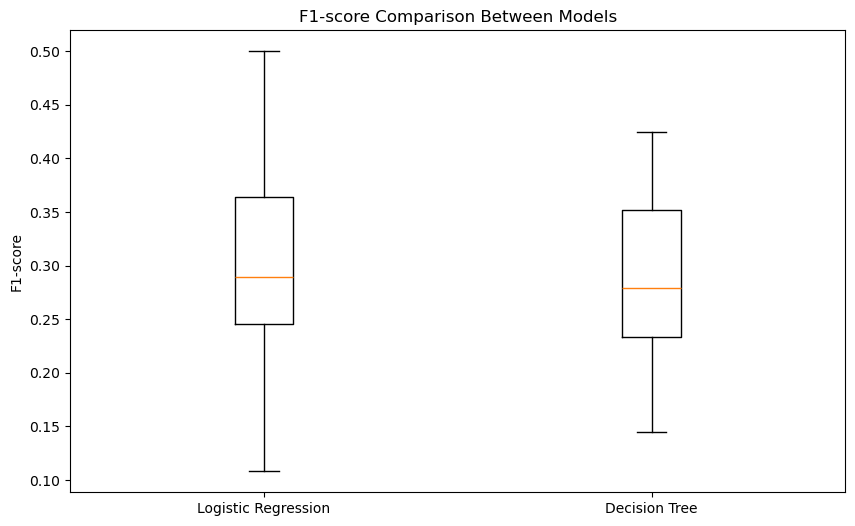

T-test Results:
T-statistic: 0.8110506497894754
P-value: 0.41930196910046846

Logistic Regression F1-score Mean: 0.29651924546079744
Decision Tree F1-score Mean: 0.28361753424358954


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Define the models with Logistic Regression in a pipeline with StandardScaler
model1 = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=2000, random_state=0))
])

# Use Decision Tree instead of Random Forest
model2 = DecisionTreeClassifier(random_state=0)

# Define the cross-validation strategy: 10 repetitions of 5-fold stratified cross-validation
cv_strategy = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

# Define scoring metrics
f1_scorer = make_scorer(f1_score)

# Perform cross-validation for both models
f1_scores_model1 = cross_val_score(model1, X_train, y_train, cv=cv_strategy, scoring=f1_scorer)
f1_scores_model2 = cross_val_score(model2, X_train, y_train, cv=cv_strategy, scoring=f1_scorer)

# Plot F1-scores in a boxplot to compare models
plt.figure(figsize=(10, 6))
plt.boxplot([f1_scores_model1, f1_scores_model2], labels=['Logistic Regression', 'Decision Tree'])
plt.title('F1-score Comparison Between Models')
plt.ylabel('F1-score')
plt.show()

# Perform a two-sided T-test on the F1-scores
t_stat, p_value = stats.ttest_ind(f1_scores_model1, f1_scores_model2)

print("T-test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Summary of results
print("\nLogistic Regression F1-score Mean:", np.mean(f1_scores_model1))
print("Decision Tree F1-score Mean:", np.mean(f1_scores_model2))


**Svar:**

*Som vi kan se i resultatene er den gjennomsnittlige F1-scoren for Logistisk regression litt høyere enn den for decision tree som kan antyde at logistisk regresjon har en svak fordel. *

#### Oppgave 2.3) 
Tren de samme modellene men denne gangen med et balansert datasett
* Bruk imbalaced learn og SMOTE til å oppsample minioritetsklassen (bare oppsample treningsdataene i kryssvalideringen - ikke valideringsdataene)
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene og sammenlign resultatene med 2.2) 

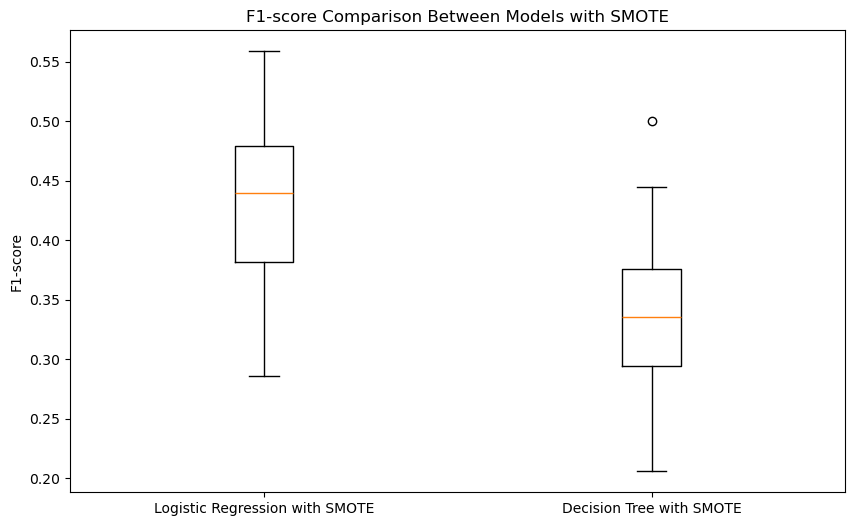

T-test Results with SMOTE:
T-statistic: 7.175392361030794
P-value: 1.391159304158254e-10

Logistic Regression with SMOTE F1-score Mean: 0.4252391838739904
Decision Tree with SMOTE F1-score Mean: 0.33466684423237936


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

# Define the models with SMOTE handling class imbalance
pipeline_model1 = Pipeline([
    ('smote', SMOTE(random_state=0)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=2000, random_state=0))
])

pipeline_model2 = Pipeline([
    ('smote', SMOTE(random_state=0)),
    ('dt', DecisionTreeClassifier(random_state=0))
])

# Define the cross-validation strategy: 10 repetitions of 5-fold stratified cross-validation
cv_strategy = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

# Define the F1 scoring metric
f1_scorer = make_scorer(f1_score)

# Perform cross-validation for both models with SMOTE
f1_scores_model1_smote = cross_val_score(pipeline_model1, X_train, y_train, cv=cv_strategy, scoring=f1_scorer)
f1_scores_model2_smote = cross_val_score(pipeline_model2, X_train, y_train, cv=cv_strategy, scoring=f1_scorer)

# Plot F1-scores in a boxplot to compare models with SMOTE
plt.figure(figsize=(10, 6))
plt.boxplot([f1_scores_model1_smote, f1_scores_model2_smote], labels=['Logistic Regression with SMOTE', 'Decision Tree with SMOTE'])
plt.title('F1-score Comparison Between Models with SMOTE')
plt.ylabel('F1-score')
plt.show()

# Perform a two-sided T-test on the F1-scores with SMOTE
t_stat_smote, p_value_smote = stats.ttest_ind(f1_scores_model1_smote, f1_scores_model2_smote)

print("T-test Results with SMOTE:")
print("T-statistic:", t_stat_smote)
print("P-value:", p_value_smote)


# Summary of results with SMOTE
print("\nLogistic Regression with SMOTE F1-score Mean:", np.mean(f1_scores_model1_smote))
print("Decision Tree with SMOTE F1-score Mean:", np.mean(f1_scores_model2_smote))


**Svar:**

*Resultatene med SMOTE viser også at Logistic regression har en høyere gjennomsnittlig F1-score enn Decision tree. Vi ser også at SMOTE har bidratt til å forbedre begge F1-scorene om vi sammenligner med resultatene fra 2.3.t-testen beviser også at det er en signifikant forskjell mellom modellene, med en lav p-verdi som indikerer at forskjellen ikke er tilfeldig.*

#### Oppgave 2.4)
Tren den beste modellen på nytt og utfør prediksjon på testsettet. Mål nå ytelsen på testsettet ved bruk av sensitivitet, spesifisitet og presisjon, itillegg til F1-skår og accuracy

In [69]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline

# Define the pipeline with SMOTE and Logistic Regression
pipeline = Pipeline([
    ('smote', SMOTE(random_state=0)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=2000, random_state=0))
])

# Train the model on the entire training set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Sensitivity
f1 = f1_score(y_test, y_pred)

# Calculate specificity from the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Display the results
print("Test Set Performance Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity (Recall):", recall)
print("Specificity:", specificity)
print("F1-Score:", f1)


Test Set Performance Metrics:
Accuracy: 0.8428571428571429
Precision: 0.3787878787878788
Sensitivity (Recall): 0.5
Specificity: 0.8891891891891892
F1-Score: 0.43103448275862066


#### Oppgave 2.5)
Del opp testsettet basert på kjønn og gjør en analyse av sensitivitet, spesifisitet og presisjon for menn og det samme for kvinner. Skriv ut og diskuter resultatet og forsøk å svar på følgende spørsmål:
* Er modellen like god for begge kjønn? 
* Hvis ikke, hva tror du er årsaken og hvilke tiltak kan vi gjøre for å forbedre modellen? 

In [72]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Reset indices for X_test and y_test to ensure alignment with y_pred
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred).reset_index(drop=True)  # Make y_pred a Series to ensure alignment

# Now create male_indices and female_indices
male_indices = X_test[X_test['Gender'] == 1].index
female_indices = X_test[X_test['Gender'] == 0].index

# Proceed with splitting y_pred and y_test based on these indices
y_test_male = y_test.loc[male_indices]
y_pred_male = y_pred.loc[male_indices]
y_test_female = y_test.loc[female_indices]
y_pred_female = y_pred.loc[female_indices]

print(f"Number of male samples: {len(male_indices)}")
print(f"Number of female samples: {len(female_indices)}")

# Ensure there are valid male and female samples in y_test
if len(male_indices) > 0 and len(female_indices) > 0:
    # Calculate precision, recall, and confusion matrix for male
    precision_male = precision_score(y_test_male, y_pred_male, zero_division=0)
    recall_male = recall_score(y_test_male, y_pred_male, zero_division=0)
    conf_matrix_male = confusion_matrix(y_test_male, y_pred_male)
    
    # Calculate precision, recall, and confusion matrix for female
    precision_female = precision_score(y_test_female, y_pred_female, zero_division=0)
    recall_female = recall_score(y_test_female, y_pred_female, zero_division=0)
    conf_matrix_female = confusion_matrix(y_test_female, y_pred_female)

    # Calculate specificity for males and females if possible
    if conf_matrix_male.size == 4:
        tn_male, fp_male, fn_male, tp_male = conf_matrix_male.ravel()
        specificity_male = tn_male / (tn_male + fp_male) if (tn_male + fp_male) != 0 else None
    else:
        specificity_male = None

    if conf_matrix_female.size == 4:
        tn_female, fp_female, fn_female, tp_female = conf_matrix_female.ravel()
        specificity_female = tn_female / (tn_female + fp_female) if (tn_female + fp_female) != 0 else None
    else:
        specificity_female = None

    # Display the results
    print("\nPerformance Metrics for Male:")
    print(f"Precision: {precision_male}")
    print(f"Sensitivity (Recall): {recall_male}")
    print(f"Specificity: {specificity_male}")
    
    print("\nPerformance Metrics for Female:")
    print(f"Precision: {precision_female}")
    print(f"Sensitivity (Recall): {recall_female}")
    print(f"Specificity: {specificity_female}")
else:
    print("No valid male or female samples in test set.")


Number of male samples: 167
Number of female samples: 253

Performance Metrics for Male:
Precision: 0.4375
Sensitivity (Recall): 0.5
Specificity: 0.9411764705882353

Performance Metrics for Female:
Precision: 0.36
Sensitivity (Recall): 0.5
Specificity: 0.8525345622119815


In [74]:
#Svar:

#Basert på resultatene, så kan vi se at modellen fungerer litt bedre for menn enn for kvinner. Dette er spesielt for presisjon og spesifiset.
#Dette kan bety at modellen lettere klassifierer menn, som kan være på grunn av ubalanse i dataene.

Kjør denne cellen til slutt og legg ved den genererte requirements.txt fila i pull requestet

In [79]:
!pip freeze > requirements.txt